# Pedido:
Reviews: sentiment analysis: 
'0' si es malo, 
'1' si es neutral y 
'2' si es positivo. 
Si ausente la reseña escrita, debe tomar el valor de 1.

developer
contenido free en %
año
cant items

user_id
dinero gastado
recomendación en %
cant de items

usuario
horas jugadas por género
año de lanzamiento
horas de juego acumuladas


mejor desarrollador
con más juegos recomendados
por usuario
por año

desarrollador 
reseñas positivas o negativas

ml: coseno de similitud
user-item(usuario): id_usuario y 5 juegos recomendados similares
item-item(producto): id_producto y 5 juegos recomendados similares


# Archivo de Items:

In [1]:
# Importar librerías Python 3.11.5
import gzip
import pandas as pd
import json
import jsonlines
import numpy as np
import os
import ast
import matplotlib.pyplot as plt

In [2]:
# Descomprimir el archivo gzip Items              5 min 13 seg
data = []

with gzip.open("users_items.json.gz", "rt", encoding = "utf-8") as file:
    for line in file:
        try:
            json_data = ast.literal_eval(line)
            data.append(json_data)
        except ValueError as e:
            print(f"Error en la línea: {line}")
            continue
df = pd.DataFrame(data)

No fue necesario hacer un ETL muy extenso a esta dataframe, está completa (nulos, más que duplicados).

In [3]:
df

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [4]:
# Ver columna de items:
df.loc[0,"items"]  # item_id item_name  playtime_forever  playtime_2weeks

[{'item_id': '10',
  'item_name': 'Counter-Strike',
  'playtime_forever': 6,
  'playtime_2weeks': 0},
 {'item_id': '20',
  'item_name': 'Team Fortress Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '30',
  'item_name': 'Day of Defeat',
  'playtime_forever': 7,
  'playtime_2weeks': 0},
 {'item_id': '40',
  'item_name': 'Deathmatch Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '50',
  'item_name': 'Half-Life: Opposing Force',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '60',
  'item_name': 'Ricochet',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '70',
  'item_name': 'Half-Life',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '130',
  'item_name': 'Half-Life: Blue Shift',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '300',
  'item_name': 'Day of Defeat: Source',
  'playtime_forever': 4733,
  'playtime_2weeks': 0},
 {'item_id': '240',
  'item_name': 'Counter-Strike: S

In [5]:
#Desanidar la columna anidada "Items", 25 seg
data_desanidada_items = []

for index, row in df.iterrows():
    user_id = row['user_id']                    # user_id	items_count	steam_id	user_url	items
    items_count = row['items_count']
    steam_id = row['steam_id']
    items = row['items']
    
    for i in items:   
        new_row = {
        'user_id': user_id,
        'items_count': items_count,
        'steam_id' : steam_id,
        'item_id': i.get('item_id', ''),
        'item_name': i.get('item_name', ''),
        'playtime_forever': i.get('playtime_forever', ''),
        'playtime_2weeks': i.get('playtime_2weeks', '')
        }
        
        data_desanidada_items.append(new_row)       # item_id item_name  playtime_forever  playtime_2weeks

In [6]:
# DataFrame desanidada:      16,2 seg
df_desanidada_items = pd.DataFrame(data_desanidada_items)

In [7]:
# Verificar dataframe:
df_desanidada_items

,user_id,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,30,Day of Defeat,7,0
3,76561197970982479,277,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,277,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...
5153204,76561198329548331,7,76561198329548331,346330,BrainBread 2,0,0
5153205,76561198329548331,7,76561198329548331,373330,All Is Dust,0,0
5153206,76561198329548331,7,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,7,76561198329548331,521570,You Have 10 Seconds 2,4,4


In [14]:
# Ver como son los datos de user_id:
df_desanidada_items["user_id"].unique()

array(['76561197970982479', 'js41637', 'evcentric', ...,
       '76561198323066619', '76561198326700687', '76561198329548331'],
      dtype=object)

In [8]:
# Verificar nulos de dataframe:
df_desanidada_items.isnull().sum()

user_id             0
items_count         0
steam_id            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

In [9]:
df_desanidada_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   steam_id          object
 3   item_id           object
 4   item_name         object
 5   playtime_forever  int64 
 6   playtime_2weeks   int64 
dtypes: int64(3), object(4)
memory usage: 275.2+ MB


EDA: análisis descriptivo y gráficas estadísticas:

In [10]:
df_desanidada_items.describe()

,items_count,playtime_forever,playtime_2weeks
count,5.153209e+06,5.153209e+06,5.153209e+06
mean,3.147229e+02,9.914951e+02,9.104707e+00
std,6.933596e+02,5.418204e+03,1.403926e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.200000e+01,0.000000e+00,0.000000e+00
50%,1.380000e+02,3.400000e+01,0.000000e+00
75%,2.760000e+02,3.550000e+02,0.000000e+00
max,7.762000e+03,6.427730e+05,1.996700e+04


Los datos totales para cada columna son 5 153 209.

items_count: Este es el número total de elementos (por ejemplo, juegos o aplicaciones). 
El valor mínimo es 1, lo que significa que al menos se tiene un elemento en los datos. 
El valor máximo es  7 762, lo que sugiere que hay un máximo de 7 762 elementos.
Un promedio de 314 +/- 693 items (existe cierta variabilidad con el número de items).

playtime_forever: Esta variable representa el tiempo total de juego acumulado por cada elemento (en horas). 
El valor mínimo es 0, lo que indica que algunos elementos no han sido jugados en absoluto. 
El valor máximo es 642 773 horas, lo que significa que hay un tiempo de juego extremadamente alto.
Un promedio de 991 +/- 5418 horas de juego total (aquí la variabilidad es mucho mayor en las horas de juego total).

playtime_2weeks: Esta variable muestra el tiempo de juego acumulado en las últimas dos semanas para cada elemento (en horas). 
El valor mínimo es 0, lo que sugiere que algunos elementos no se han jugado en las últimas dos semanas. 
El valor máximo es 19 967, lo que indica que hay un tiempo de juego significativo en ese período.
Un promedio de 9 +/- 140 horas de juego total en las últimas dos semanas (acá la variabilidad es menor que en tiempo total).

En resumen, estos valores proporcionan información sobre la distribución y variabilidad de los datos relacionados 
con los elementos (items), su tiempo de juego acumulado y su actividad reciente.

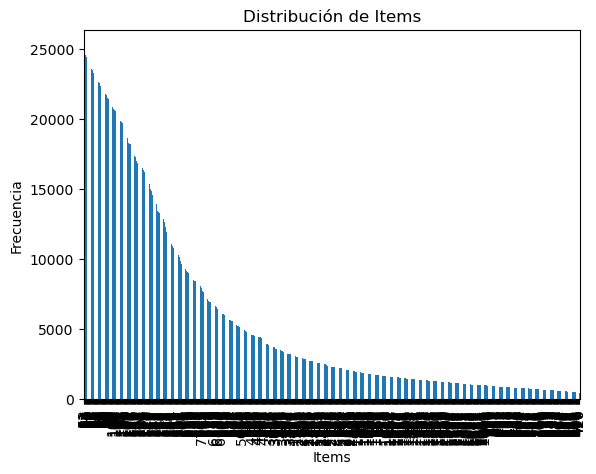

In [11]:
# Graficar un histograma de la columna "items_count"
df_desanidada_items["items_count"].value_counts().plot(kind="bar")
plt.xlabel("Items")
plt.ylabel("Frecuencia")
plt.title("Distribución de Items")
plt.show()

In [13]:
# Guardamos nueva data en un archivo .csv
df_desanidada_items.to_csv('Third_Items.csv', index=False)